In [1]:
from ola_models import * 
from ola_RNN import * 

import os, time, copy, math, re, json, pickle, random
import numpy as np
import pandas as pd

import torch, torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

from functools import partial 

cuda_available = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_available else "cpu")
print(f'''using device {device}''')

path = !pwd
path = path[0]
print(path)

using device cuda:0
/home/r2/Documents/RNNexp


In [2]:
bs  = 20
sql = 30 
lr  = 0.0005 

sched = combine_scheds([0.15, 0.25, 0.2, 0.4], [sched_cos(0.0005, 0.0008), sched_cos(0.0008, 0.0005),sched_lin(0.0005,0.0005),sched_cos(0.0005,0.00005)]) 
data          = pp_trumpdata(path+"/data/trump/", [0.9,0.95], bs)
data.train_dl = TweetDataLoader(data,data.train.tweets,bs,sql,shuffle=True)
data.valid_dl = TweetDataLoader(data,data.valid.tweets,bs,sql,shuffle=False)

model  = cuda(GRU(len(data.decoder), 150))
opt    = optim.RMSprop(model.parameters(), lr)
learn  = Learner(model,  nn.NLLLoss(), opt , data, lr=lr)
# , , ParamScheduler('lr',sched)]) StatsCallback()

In [3]:
cbs    = CallbackHandler([CounterCallback(5000),StatsCallback()])

In [4]:
fit_rnn(1,learn,cbs)

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
getting validation
torch.Size([20, 30, 433]

getting validation
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433]

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
finished: 0.16000000000000253%
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
getting validation
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433]

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
finished: 0.3199999999999974%
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([2

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
getting validation
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433]

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20

torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
finished: 0.4999999999999776%
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([20, 30, 433])
30
torch.Size([2

KeyboardInterrupt: 

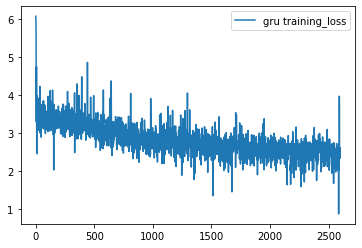

In [5]:
plt.figure()
plt.plot([x for x in range(len(learn.stats.train_loss))],learn.stats.train_loss,label='gru training_loss')
plt.legend()      
plt.savefig('./exps/1/grutrloss')

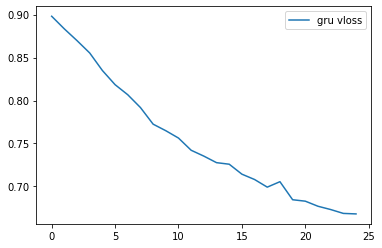

In [6]:
plt.figure()
plt.plot([x for x in range(len(learn.stats.valid_loss))],learn.stats.valid_loss,label='gru vloss')
plt.legend()      
learn.stats.valid_loss[-1]
plt.savefig('./exps/1/gruvloss')

In [ ]:
plt.figure()
plt.plot([x for x in range(len(learn.stats.lrs))],learn.stats.lrs,label='learningrate')
plt.legend()      

In [ ]:
generate_seq(learn.model,learn.data,300)

In [ ]:
model2  = cuda(RNN(len(data.decoder), 150))
opt2    = optim.RMSprop(model2.parameters(), lr)
learn2  = Learner(model2,  nn.NLLLoss(), opt2 , data, lr=lr)

In [ ]:
fit_rnn(1, learn2, cbs)

In [ ]:
plt.figure()
plt.plot([x for x in range(len(learn2.stats.train_loss))],learn2.stats.train_loss,label='rnn training_loss')
plt.legend()      
plt.savefig('./exps/1/rnntrloss')

In [ ]:
plt.figure()
plt.plot([x for x in range(len(learn2.stats.valid_loss))],learn2.stats.valid_loss,label='rnn vloss')
plt.legend()      
learn2.stats.valid_loss[-1]
plt.savefig('./exps/1/rnnvloss')